In [28]:
import pandas as pd
import plotly.express as px
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer

In [29]:
tweets = pd.read_csv("../../tweets.csv", index_col=None)
tweets

,bookmark_count,created_at,favorite_count,full_text,id_str,lang,possibly_sensitive,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location
0,0,Thu Nov 10 00:52:25 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507635992039426,es,NaN,0,0,56,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
1,0,Thu Nov 10 00:52:17 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | El donativ...,1590507601376456706,es,NaN,0,0,59,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
2,0,Thu Nov 10 00:52:12 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507582455975937,es,NaN,0,0,54,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
3,0,Thu Nov 10 00:51:57 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “En la act...,1590507519704592384,es,NaN,0,0,53,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
4,0,Thu Nov 10 00:51:44 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “Hecho que...,1590507465376149505,es,NaN,0,0,49,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27934,0,Thu Nov 16 07:51:13 +0000 2023,11,The meeting between Chinese President Xi Jinpi...,1725058929074520161,en,False,0,1,7,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27935,0,Thu Nov 16 07:30:46 +0000 2023,3,"Xi on perceiving, conceiving China-U.S. relati...",1725053783363985462,en,False,0,2,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27936,1,Thu Nov 16 07:00:17 +0000 2023,7,Friendly groups in the United States gave a we...,1725046112086831397,en,False,0,1,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27937,0,Thu Nov 16 06:51:44 +0000 2023,2,The United Nations Security Council adopted a ...,1725043958106259522,en,False,0,1,1,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN


In [30]:
english_tweets = tweets[tweets["lang"] == "en"]
english_tweets

,bookmark_count,created_at,favorite_count,full_text,id_str,lang,possibly_sensitive,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location
20,0,Fri Feb 24 09:04:30 +0000 2017,2,China suspends import of coal from North Korea...,835052774316371968,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
21,0,Wed Feb 15 01:40:17 +0000 2017,0,It's time Tsai stopped playing little tricks. ...,831679494347841536,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
22,0,Tue Feb 14 01:52:04 +0000 2017,0,'Belt and Road' gives lift to China's ties wit...,831320071184060416,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
23,0,Thu Feb 09 05:21:34 +0000 2017,0,China and the Middle East - a rapidly changing...,829560854249095169,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
24,0,Tue Feb 07 09:41:22 +0000 2017,0,Video: Why does Japanese embassy act like a sp...,828901457495625728,en,False,0,0,0,813204650484604928,theChinaMosaic,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27934,0,Thu Nov 16 07:51:13 +0000 2023,11,The meeting between Chinese President Xi Jinpi...,1725058929074520161,en,False,0,1,7,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27935,0,Thu Nov 16 07:30:46 +0000 2023,3,"Xi on perceiving, conceiving China-U.S. relati...",1725053783363985462,en,False,0,2,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27936,1,Thu Nov 16 07:00:17 +0000 2023,7,Friendly groups in the United States gave a we...,1725046112086831397,en,False,0,1,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN
27937,0,Thu Nov 16 06:51:44 +0000 2023,2,The United Nations Security Council adopted a ...,1725043958106259522,en,False,0,1,1,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN


In [31]:
hashtags = pd.read_csv("../../hashtags.csv", index_col=None)
hashtags

,id_str,user_id_str,created_at,screen_name,location,hashtag
0,1590507635992039426,1033920834409312256,Thu Nov 10 00:52:25 +0000 2022,oujianhong,NaN,DonativoDeChina
1,1590507601376456706,1033920834409312256,Thu Nov 10 00:52:17 +0000 2022,oujianhong,NaN,DonativoDeChina
2,1590507582455975937,1033920834409312256,Thu Nov 10 00:52:12 +0000 2022,oujianhong,NaN,DonativoDeChina
3,1590507519704592384,1033920834409312256,Thu Nov 10 00:51:57 +0000 2022,oujianhong,NaN,DonativoDeChina
4,1590507465376149505,1033920834409312256,Thu Nov 10 00:51:44 +0000 2022,oujianhong,NaN,DonativoDeChina
...,...,...,...,...,...,...
23350,1725117378676338976,2985114866,Thu Nov 16 11:43:28 +0000 2023,CCTV_Plus,"Beijing, CHINA",APEC2023
23351,1725075727215886818,2985114866,Thu Nov 16 08:57:58 +0000 2023,CCTV_Plus,"Beijing, CHINA",APEC2023
23352,1725053783363985462,2985114866,Thu Nov 16 07:30:46 +0000 2023,CCTV_Plus,"Beijing, CHINA",APEC2023
23353,1725046112086831397,2985114866,Thu Nov 16 07:00:17 +0000 2023,CCTV_Plus,"Beijing, CHINA",APEC2023


In [32]:
canis_df = pd.read_csv("../../data/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.csv", index_col=None)
# canis_df = canis_df[canis_df["X (Twitter) handle"].isna() == False]
canis_df.columns

Index(['Name (English)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Parent entity (English)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #'],
      dtype='object')

In [33]:
result = pd.merge(canis_df, hashtags, left_on='X (Twitter) handle', right_on='screen_name')
result

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #,id_str,user_id_str,created_at,screen_name,location,hashtag
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,Tue Nov 07 09:10:56 +0000 2023,_bubblyabby_,NaN,Gaza
1,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,Tue Nov 07 09:10:56 +0000 2023,_bubblyabby_,NaN,Ukraine️
2,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,Tue Nov 07 09:10:56 +0000 2023,_bubblyabby_,NaN,Israel
3,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721817501619896488,2693415903,Tue Nov 07 09:10:56 +0000 2023,_bubblyabby_,NaN,Palestine
4,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1721331567686295868,2693415903,Mon Nov 06 01:00:01 +0000 2023,_bubblyabby_,NaN,Palestine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22748,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1205458647699976193,1197929251351064576,Fri Dec 13 12:05:12 +0000 2019,ZShilei,NaN,poverty
22749,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1205454223648837632,1197929251351064576,Fri Dec 13 11:47:37 +0000 2019,ZShilei,NaN,Fightingterrorism
22750,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1205454223648837632,1197929251351064576,Fri Dec 13 11:47:37 +0000 2019,ZShilei,NaN,Xinjiang
22751,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1202642133972185088,1197929251351064576,Thu Dec 05 17:33:23 +0000 2019,ZShilei,NaN,Xinjiang


In [34]:
hashtags_count = hashtags['hashtag'].value_counts()
hashtags_count

China                             1559
XiJinping                          256
APEC                               253
APEC2023                           226
BRI                                222
                                  ... 
all4afghan                           1
CámaraDeEmpresasChinasEnPanamá       1
มือสอง                               1
DonaldMcNeil                         1
bordersecurity                       1
Name: hashtag, Length: 6319, dtype: int64

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_hashtags_df = pd.DataFrame({'Hashtags': hashtags_count.head(20).index, 'Count': hashtags_count.head(20).values})

# Create a bar plot with Plotly
fig = px.bar(
    top_hashtags_df,
    x='Hashtags',
    y='Count',
    title='Top Hashtags',
    labels={'Hashtags': 'Hashtags', 'Count': 'Count'},
    category_orders={'Hashtags': hashtags_count.head(20).index},
)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis=dict(tickangle=45, tickmode='array'))

# Show the plot
fig.show()

In [66]:
canis_df.columns

Index(['Name (English)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Parent entity (English)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #',
       'Total Followers'],
      dtype='object')

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2195367043.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




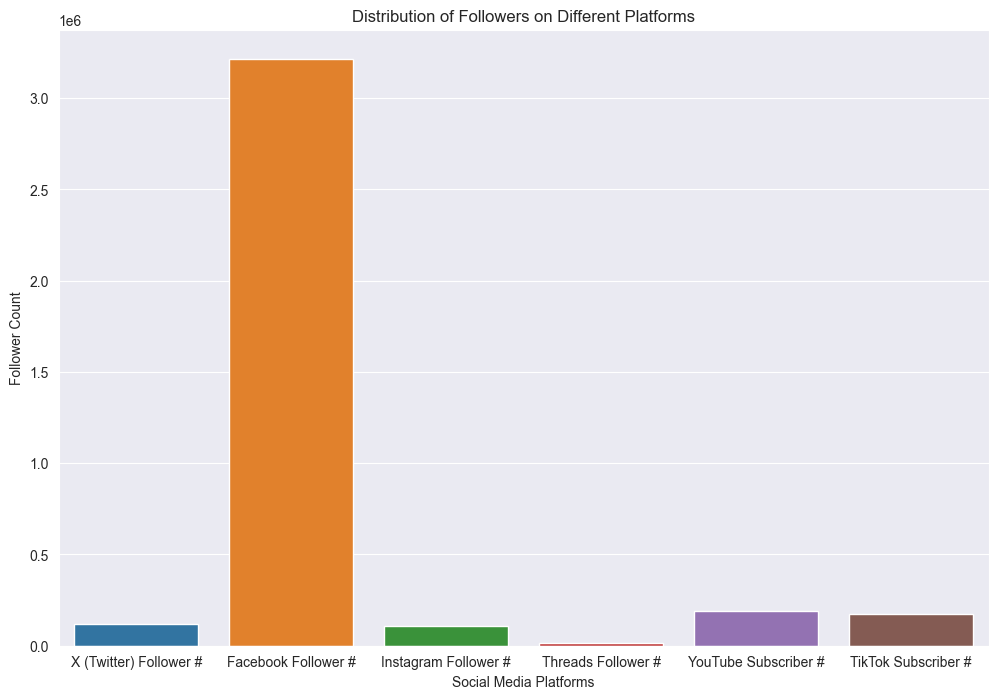

In [36]:
social_media_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']

# Convert the follower columns to numeric (remove commas and convert to int)
# for col in social_media_columns:
#     canis_df[col] = pd.to_numeric(canis_df[col].str.replace(',', ''), errors='coerce')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=canis_df[social_media_columns], ci=None)
plt.title('Distribution of Followers on Different Platforms')
plt.xlabel('Social Media Platforms')
plt.ylabel('Follower Count')
plt.show()

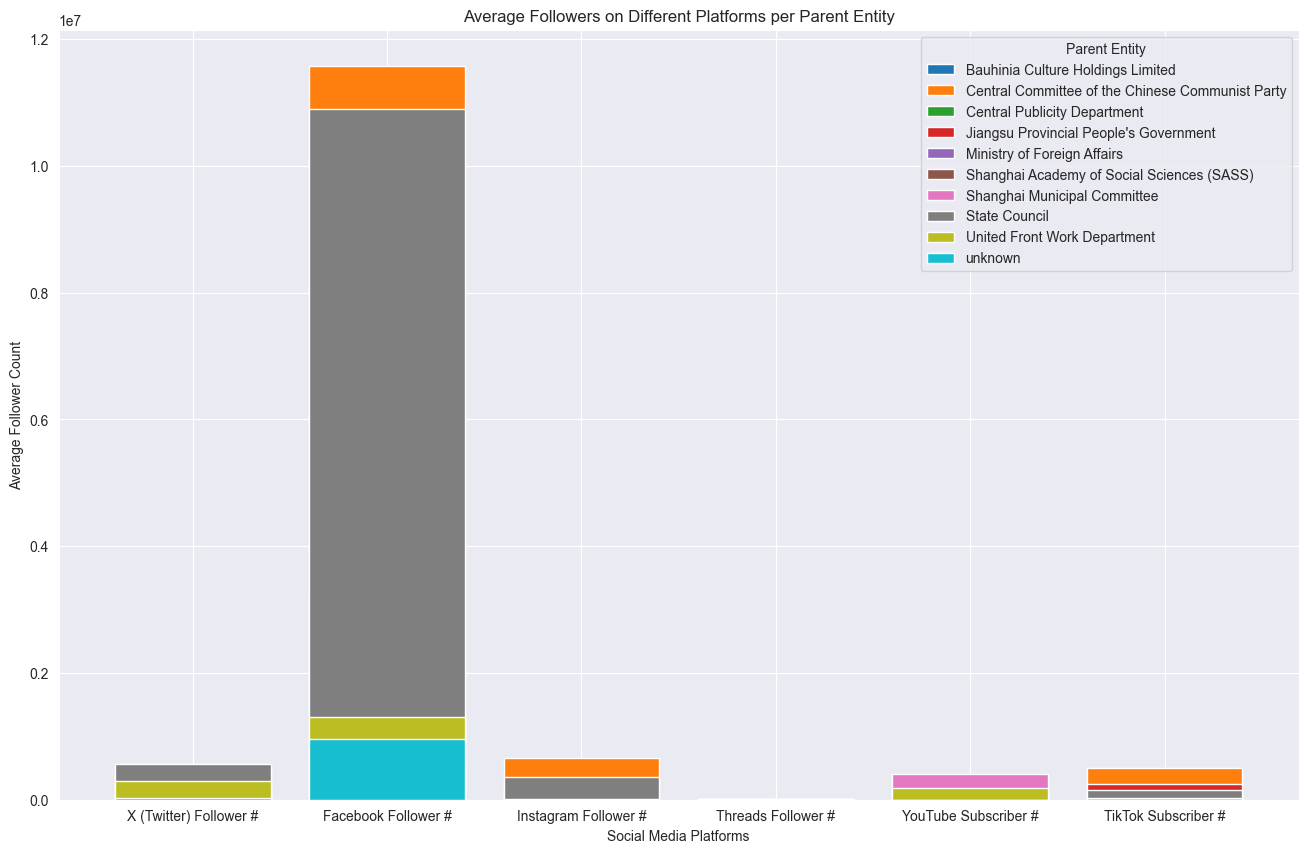

In [37]:
plt.figure(figsize=(16, 10))
top_10_entities = canis_df['Parent entity (English)'].value_counts().head(10).keys()
 # = canis_df.groupby('Parent entity (English)')['Total Followers'].sum().nlargest(10).index
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

for parent_entity, group in df_top_10.groupby('Parent entity (English)'):
    plt.bar(social_media_columns, group[social_media_columns].mean(), label=parent_entity)

plt.title('Average Followers on Different Platforms per Parent Entity')
plt.xlabel('Social Media Platforms')
plt.ylabel('Average Follower Count')
plt.legend(title='Parent Entity')
plt.show()

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2236829853.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




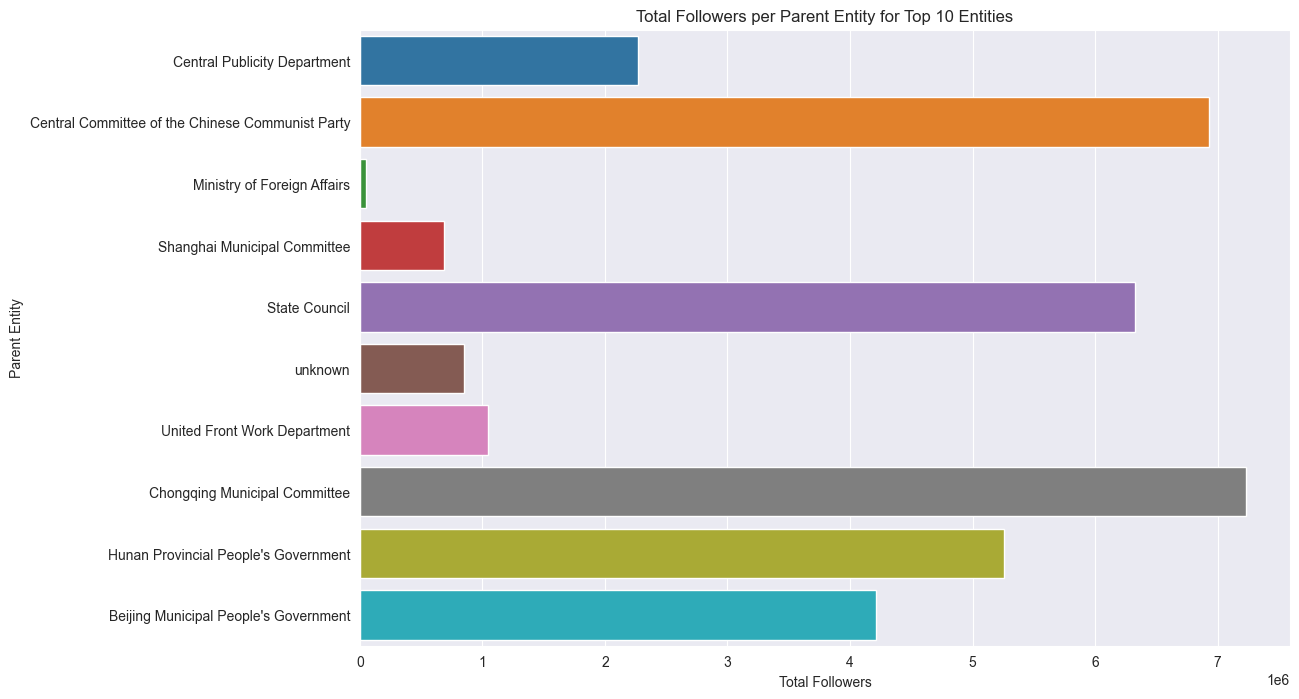

In [38]:
social_media_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'YouTube Subscriber #', 'TikTok Subscriber #']
canis_df['Total Followers'] = canis_df[social_media_columns].sum(axis=1)
top_10_entities = canis_df.groupby('Parent entity (English)')['Total Followers'].sum().nlargest(10).index
canis_df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Plot a bar chart for total followers per parent entity
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Followers', y='Parent entity (English)', data=canis_df_top_10, ci=None)

plt.title('Total Followers per Parent Entity for Top 10 Entities')
plt.xlabel('Total Followers')
plt.ylabel('Parent Entity')
plt.show()

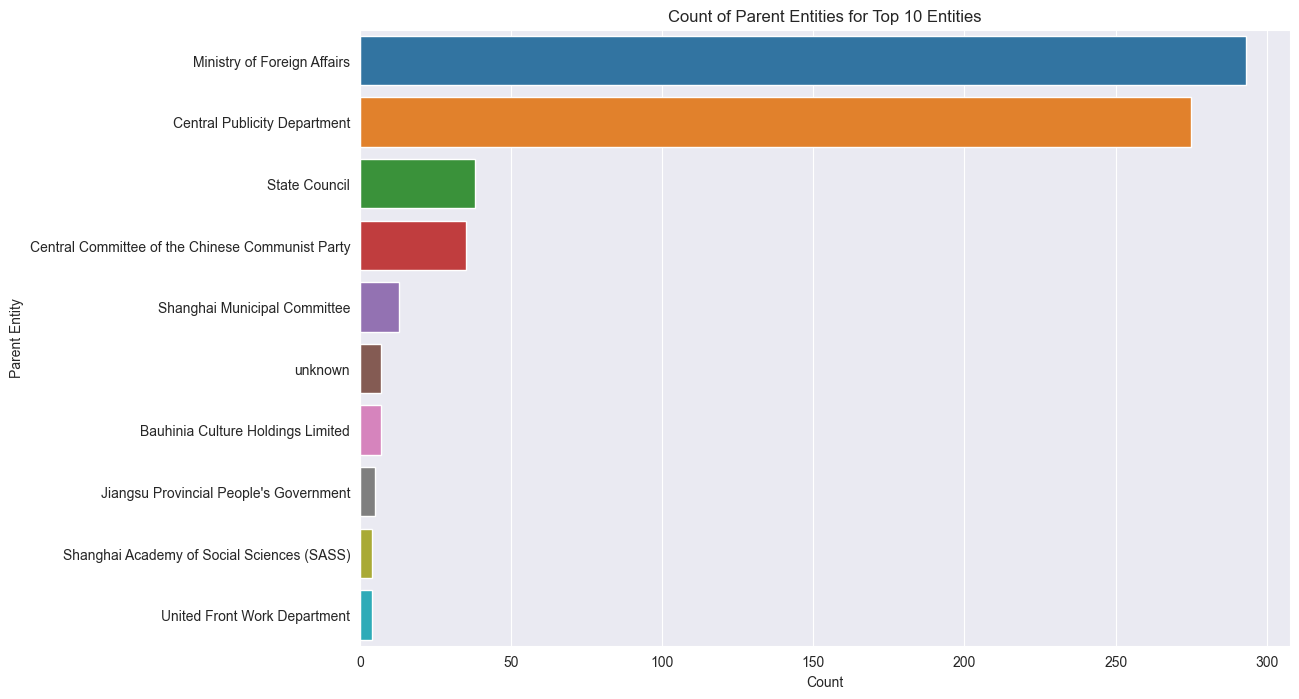

In [39]:
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(10).index

df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Plot a countplot for the top 10 parent entities
plt.figure(figsize=(12, 8))
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities)

plt.title('Count of Parent Entities for Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Parent Entity')
plt.show()


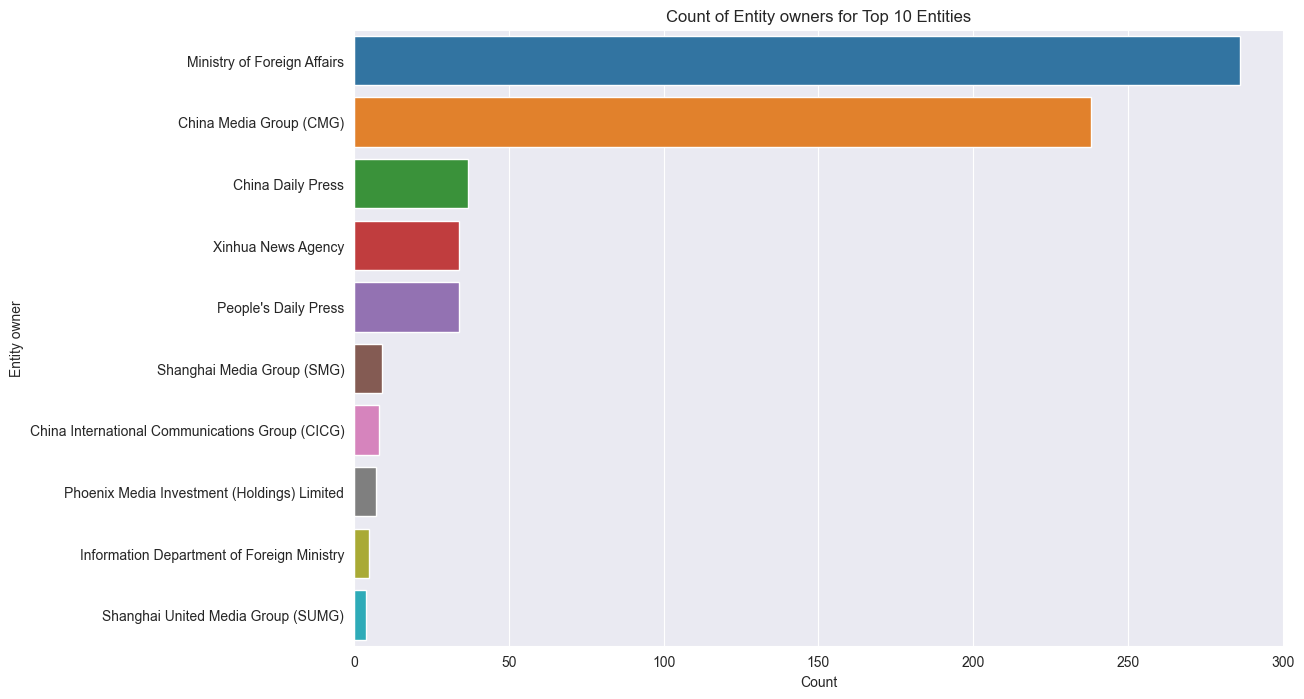

In [40]:
top_10_entities = canis_df['Entity owner (English)'].value_counts().nlargest(10).index

df_top_10 = canis_df[canis_df['Entity owner (English)'].isin(top_10_entities)]

# Plot a countplot for the top 10 parent entities
plt.figure(figsize=(12, 8))
sns.countplot(y='Entity owner (English)', data=df_top_10, order=top_10_entities)

plt.title('Count of Entity owners for Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Entity owner')
plt.show()


In [41]:
canis_df['Entity owner (English)'].value_counts()

Ministry of Foreign Affairs                     286
China Media Group (CMG)                         238
China Daily Press                                37
Xinhua News Agency                               34
People's Daily Press                             34
                                               ... 
Chengdu Municipal People's Government             1
Jiaxing Radio and Television Media Co., Ltd.      1
Ministry of Commerce Information Office           1
Qiushi Magazine Press                             1
Wenshan Radio & Television Station                1
Name: Entity owner (English), Length: 87, dtype: int64

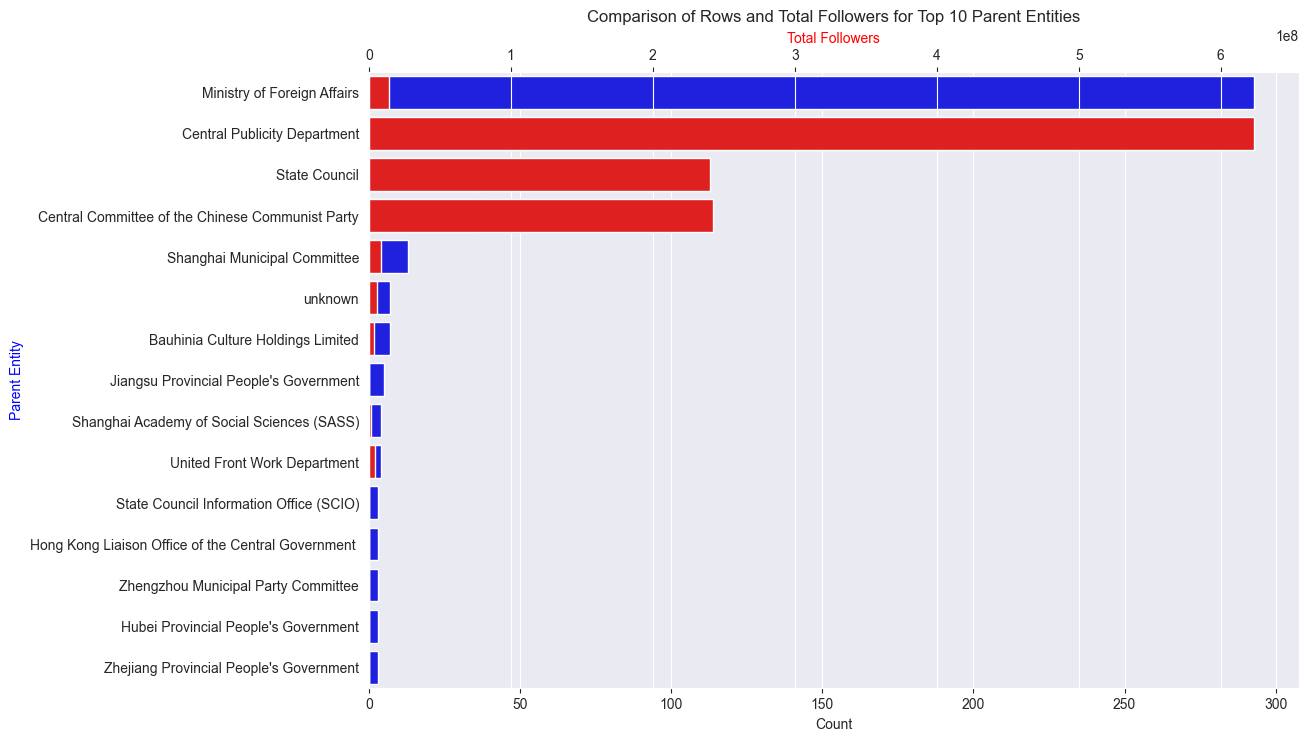

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(15).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the count of rows
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities, ax=ax1, color='b')
ax1.set_xlabel('Count')
ax1.set_ylabel('Parent Entity', color='b')

# Create a second y-axis to plot total followers
ax2 = ax1.twiny()
sns.barplot(x='Total Followers', y='Parent entity (English)', data=df_top_10.groupby('Parent entity (English)')['Total Followers'].sum().reset_index(), order=top_10_entities, ax=ax2, color='r')
ax2.set_xlabel('Total Followers', color='r')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.show()


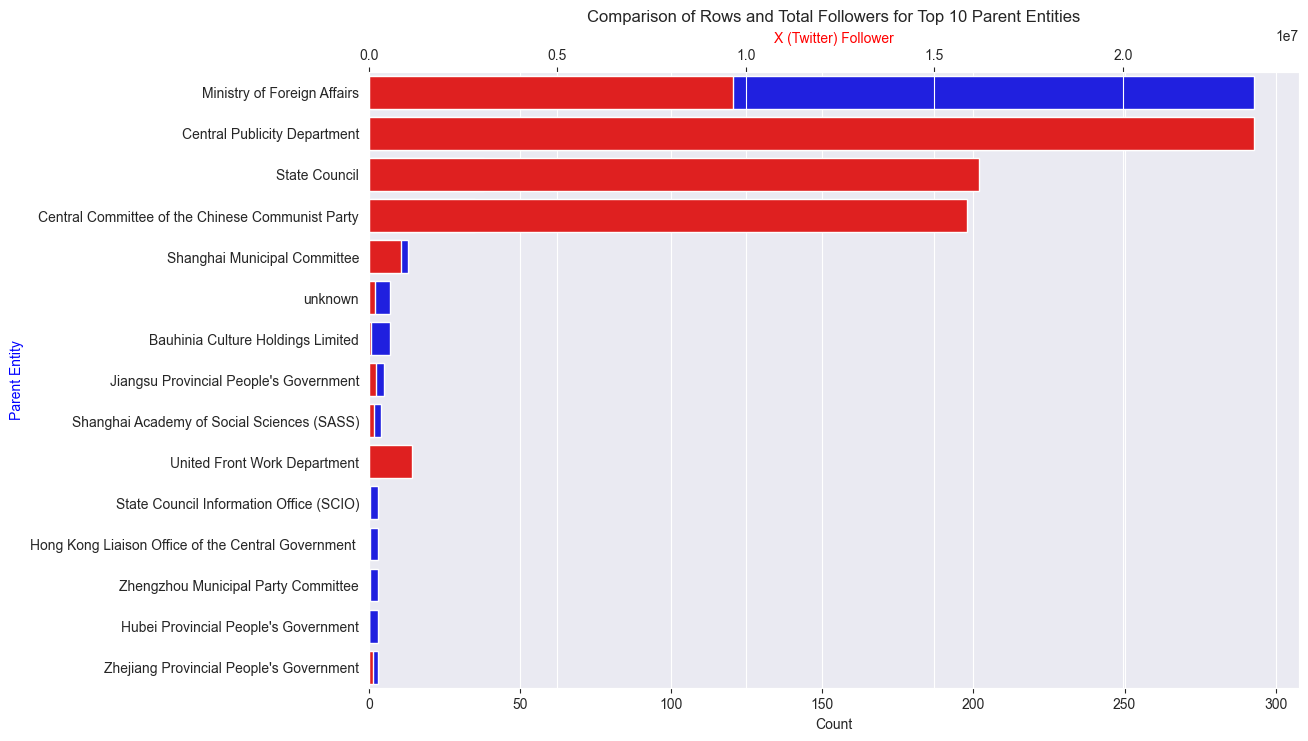

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(15).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the count of rows
sns.countplot(y='Parent entity (English)', data=df_top_10, order=top_10_entities, ax=ax1, color='b')
ax1.set_xlabel('Count')
ax1.set_ylabel('Parent Entity', color='b')

# Create a second y-axis to plot total followers
ax2 = ax1.twiny()
sns.barplot(x='X (Twitter) Follower #', y='Parent entity (English)', data=df_top_10.groupby('Parent entity (English)')['X (Twitter) Follower #'].sum().reset_index(), order=top_10_entities, ax=ax2, color='r')
ax2.set_xlabel('X (Twitter) Follower', color='r')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.show()


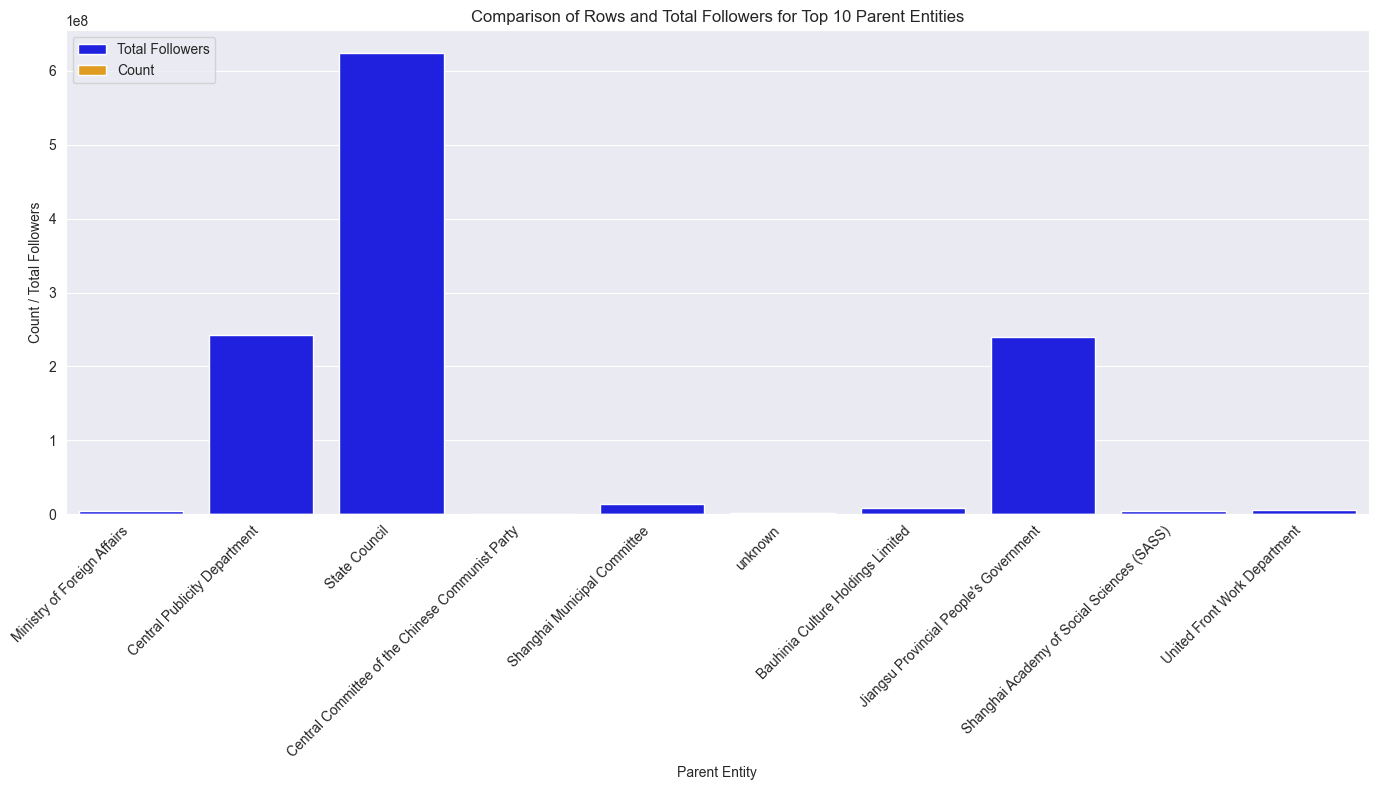

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Get the top 10 parent entities based on the count
top_10_entities = canis_df['Parent entity (English)'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 entities
df_top_10 = canis_df[canis_df['Parent entity (English)'].isin(top_10_entities)]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 8))

# Grouped bar plot for count of rows and total followers
sns.barplot(x='Parent entity (English)', y='Total Followers', data=df_top_10.groupby('Parent entity (English)')['Total Followers'].sum().reset_index(), color='blue', ax=ax, label='Total Followers')
sns.barplot(x='Parent entity (English)', y='Count', data=df_top_10['Parent entity (English)'].value_counts().reset_index().rename(columns={'index': 'Parent entity (English)', 'Parent entity (English)': 'Count'}), color='orange', ax=ax, label='Count')

ax.set_xlabel('Parent Entity')
ax.set_ylabel('Count / Total Followers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.title('Comparison of Rows and Total Followers for Top 10 Parent Entities')
plt.tight_layout()
plt.legend(loc='upper left')  # Add legend
plt.show()


In [45]:
# Group by Parent entity and sum the total followers
followers_data = canis_df.groupby('Parent entity (English)')['Total Followers'].sum().reset_index()

# Select the top 15 entities
top_15_followers = followers_data.nlargest(15, 'Total Followers')

# Plot the pie chart
fig = px.pie(
    top_15_followers,
    names='Parent entity (English)',
    values='Total Followers',
    title='Top 15 Parent Entities by Total Followers',
)

# Show the plot
fig.show()

In [46]:
# Group by Parent entity and count the occurrences
entity_counts = canis_df['Parent entity (English)'].value_counts().reset_index()
entity_counts.columns = ['Parent entity', 'Count']

# Select the top 15 entities
top_15_entities = entity_counts.head(15)
# Plot the pie chart
fig = px.pie(
    top_15_entities,
    names='Parent entity',
    values='Count',
    title='Distribution of Parent Entities',
)

# Show the plot
fig.show()


In [47]:
# List of social media columns
social_media_columns = ['X (Twitter) Follower #', 'Facebook Follower #', 'Instagram Follower #', 'Threads Follower #', 'TikTok Subscriber #', 'YouTube Subscriber #']

for column in social_media_columns:
    # Create a new DataFrame for the current social media
    social_media_data = canis_df.groupby('Parent entity (English)')[column].sum().reset_index()

    # Select the top 15 entities based on the current social media
    top_15_entities = social_media_data.nlargest(15, column)

    # Plot the pie chart
    fig = px.pie(
        top_15_entities,
        names='Parent entity (English)',
        values=column,
        title=f'Top 15 Parent Entities by {column} (Across Social Media)',
    )

    # Show the plot
    fig.show()

In [48]:
canis_df

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,Threads account,Threads URL,Threads Follower #,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #,Total Followers
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,_bubblyabby_,https://www.threads.net/@_bubblyabby_,197.0,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,1404154.0
1,CGTN Culture Express,Anglosphere,English,China Media Group (CMG),Central Publicity Department,_cultureexpress,https://twitter.com/_cultureexpress,2488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3123.0
2,All-China Students' Federation,China,Chinese,All-China Students' Federation,Central Committee of the Communist Youth League,ACSF1919,https://twitter.com/ACSF1919,5136.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5136.0
3,Chen Zhong (Dechinghutay / Ghoti),Afghanistan,Pashto,China Media Group (CMG),Central Publicity Department,afghanchina,https://twitter.com/afghanchina,1800.0,dechinghutay,https://www.facebook.com/dechinghutay/,...,NaN,NaN,NaN,dechinghutay,https://www.youtube.com/channel/UCXl9X2fi65wKf...,695.0,dechinghutay,https://www.tiktok.com/@dechinghutay,326100.0,1928595.0
4,Yang Sheng,Anglosphere,English,People's Daily Press,Central Committee of the Chinese Communist Party,AlexYsalex17,https://twitter.com/AlexYsalex17,2821.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Yang Gang,Singapore,Chinese,Ministry of Foreign Affairs,Ministry of Foreign Affairs,NaN,NaN,NaN,profile.php?id=100085710623943,https://www.facebook.com/profile.php?id=100085...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0
754,Chinese Office of the Commissioner in Hong Kong,Hong Kong,Chinese,Office of the Commissioner of the Ministry of ...,Ministry of Foreign Affairs,NaN,NaN,NaN,MFAofficeHK,https://www.facebook.com/MFAofficeHK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,853000.0
755,Shiting Wenshan,Yunnan,Chinese,Wenshan Radio & Television Station,Wenshan Municipal People's Government,NaN,NaN,NaN,视听文山-100068200601004,https://www.facebook.com/p/%E8%A7%86%E5%90%AC%...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
756,New Marco Polo,Anglosphere,English,Xinhua News Agency,State Council,NaN,NaN,NaN,marcopolo.beijing/,https://www.facebook.com/marcopolo.beijing/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2300000.0


/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/672405911.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



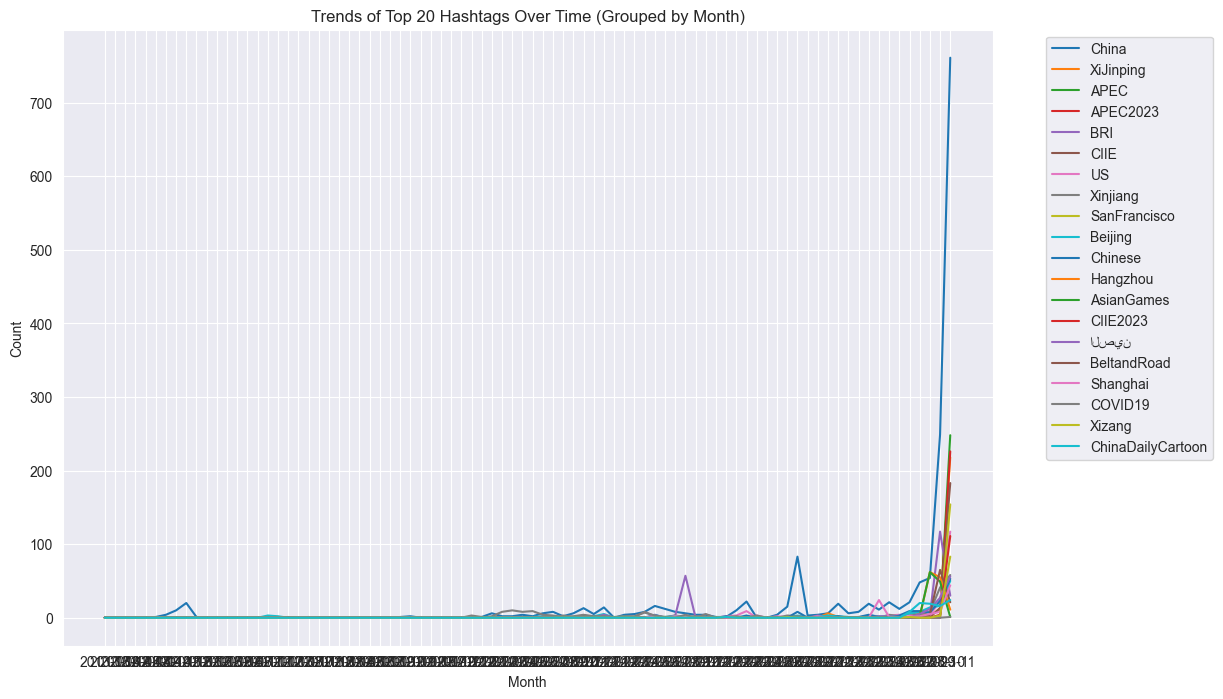

In [49]:
# Convert 'created_at' to datetime format
hashtags['created_at'] = pd.to_datetime(hashtags['created_at'])

# Extract month and year from 'created_at'
hashtags['month_year'] = hashtags['created_at'].dt.to_period('M')

# Group by 'month_year' and 'hashtag', counting occurrences
hashtag_counts = hashtags.groupby(['month_year', 'hashtag']).size().unstack().fillna(0)

# Select the top 20 hashtags by total count
top_20_hashtags = hashtag_counts.sum().nlargest(20).index

# Plotting time series for top 20 hashtags
plt.figure(figsize=(12, 8))
for hashtag in top_20_hashtags:
    plt.plot(hashtag_counts.index.astype(str), hashtag_counts[hashtag], label=hashtag)

plt.title('Trends of Top 20 Hashtags Over Time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2529963264.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2529963264.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



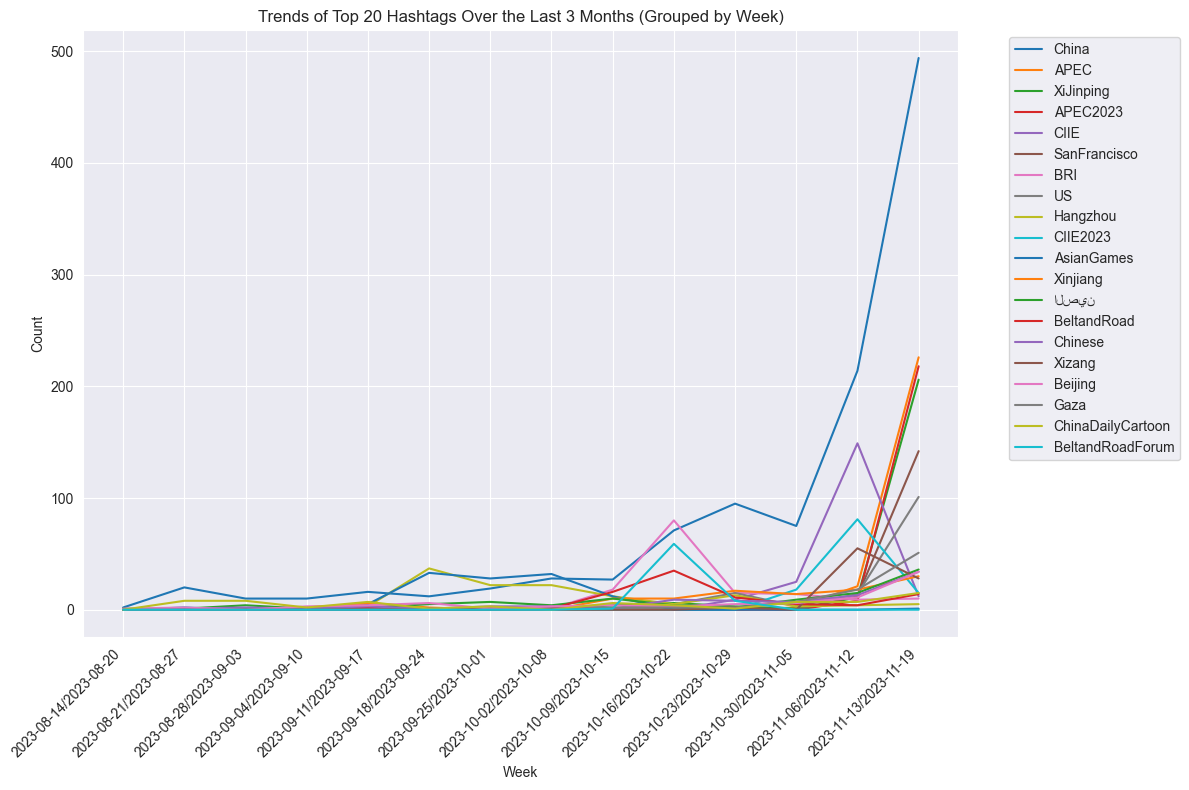

In [50]:
# Convert 'created_at' to datetime format
hashtags['created_at'] = pd.to_datetime(hashtags['created_at'])

# Filter data for the last 3 months
last_3_months_hashtags = hashtags[hashtags['created_at'] >= hashtags['created_at'].max() - pd.DateOffset(months=3)]

# Extract week and year from 'created_at'
last_3_months_hashtags['week_year'] = last_3_months_hashtags['created_at'].dt.to_period('W')

# Group by 'week_year' and 'hashtag', counting occurrences
hashtag_counts = last_3_months_hashtags.groupby(['week_year', 'hashtag']).size().unstack().fillna(0)

# Select the top 20 hashtags by total count
top_20_hashtags = hashtag_counts.sum().nlargest(20).index

# Plotting time series for top 20 hashtags
plt.figure(figsize=(12, 8))
for hashtag in top_20_hashtags:
    plt.plot(hashtag_counts.index.astype(str), hashtag_counts[hashtag], label=hashtag)

plt.title('Trends of Top 20 Hashtags Over the Last 3 Months (Grouped by Week)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
plt.show()


/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3972306296.py:13: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3972306296.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3972306296.py:31: UserWarning:

Glyph 4102 (\N{MYANMAR LETTER CHA}) missing from current font.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3972306296.py:31: UserWarning:

Glyph 4100 (\N{MYANMAR LETTER NGA}) missing from current font.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3972306296.py:31: UserWarning:

Glyph 4154 (\N{MYANMAR SIGN ASA

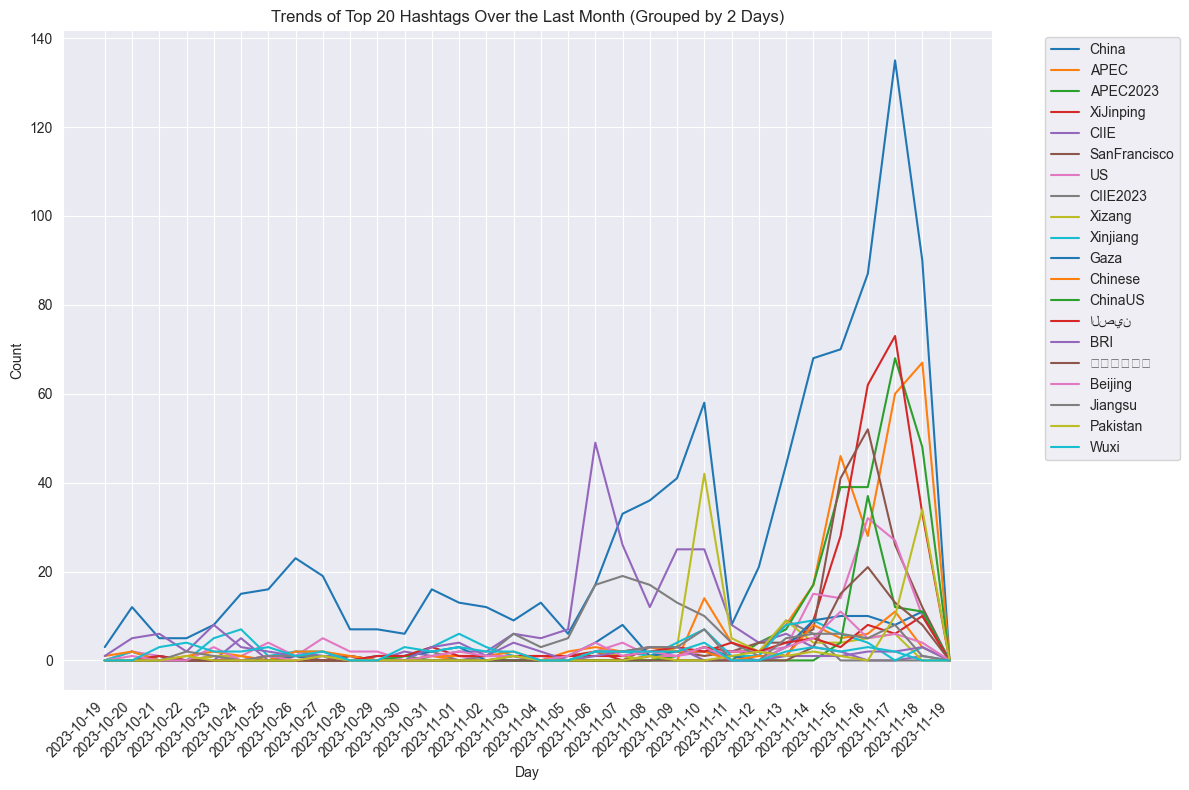

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming hashtags is your DataFrame with 'created_at' and 'hashtag' columns

# Convert 'created_at' to datetime format
hashtags['created_at'] = pd.to_datetime(hashtags['created_at'])

# Filter data for the last month
last_month_hashtags = hashtags[hashtags['created_at'] >= hashtags['created_at'].max() - pd.DateOffset(months=1)]

# Extract day and month from 'created_at'
last_month_hashtags['day_month'] = last_month_hashtags['created_at'].dt.to_period('2D')

# Group by 'day_month' and 'hashtag', counting occurrences
hashtag_counts = last_month_hashtags.groupby(['day_month', 'hashtag']).size().unstack().fillna(0)

# Select the top 20 hashtags by total count
top_20_hashtags = hashtag_counts.sum().nlargest(20).index

# Plotting time series for top 20 hashtags
plt.figure(figsize=(12, 8))
for hashtag in top_20_hashtags:
    plt.plot(hashtag_counts.index.astype(str), hashtag_counts[hashtag], label=hashtag)

plt.title('Trends of Top 20 Hashtags Over the Last Month (Grouped by 2 Days)')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of rotated labels
plt.show()


In [52]:
import pandas as pd

# Assuming hashtags is your DataFrame with 'created_at' and 'hashtag' columns

# Convert 'created_at' to datetime format
hashtags['created_at'] = pd.to_datetime(hashtags['created_at'])

# Filter data for the last month
last_month_hashtags = hashtags[hashtags['created_at'] >= hashtags['created_at'].max() - pd.DateOffset(months=1)]

# Extract day and month from 'created_at'
last_month_hashtags['day_month'] = last_month_hashtags['created_at'].dt.to_period('2D')

# Group by 'day_month' and 'hashtag', counting occurrences
hashtag_counts = last_month_hashtags.groupby(['day_month', 'hashtag']).size().unstack().fillna(0)

# Select the top 20 hashtags by total count
top_20_hashtags = hashtag_counts.sum().nlargest(20).index

# Create an interactive line plot with plotly express
fig = px.line(hashtag_counts, x=hashtag_counts.index.astype(str), y=top_20_hashtags, labels={'value': 'Count'}, title='Trends of Top 20 Hashtags Over the Last Month (Grouped by 2 Days)')

# Add hover effects
fig.update_traces(hovertemplate='<b>%{y}</b>')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()


/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2425219764.py:12: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/2425219764.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.

/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.

/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.

/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.

/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.

/Users/mohammadreza/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: 

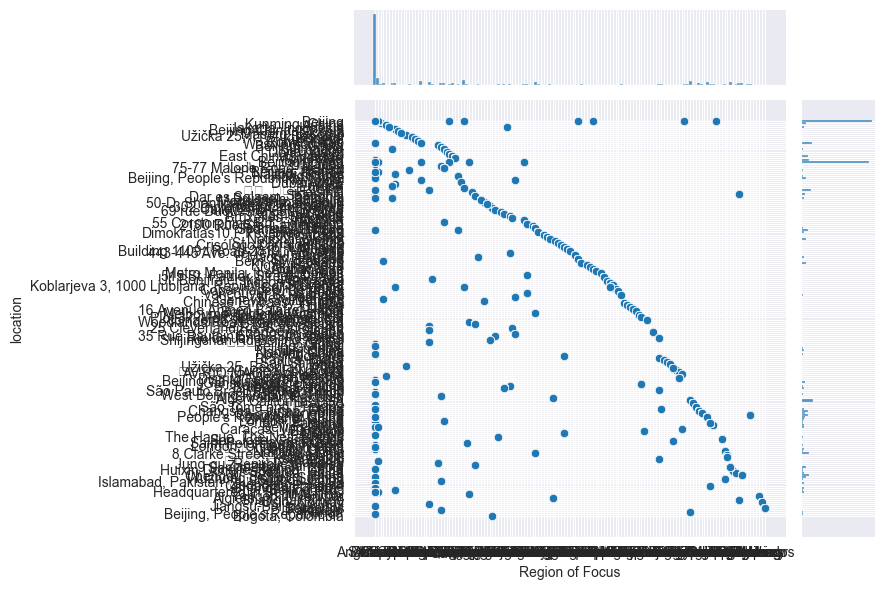

In [53]:
import seaborn as sns

# Assuming df is your DataFrame
sns.jointplot(x='Region of Focus', y='location', data=result, kind='scatter')
plt.show()


In [54]:
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Region of Focus', hue='hashtag', data=result, order=result['Region of Focus'].value_counts().index)
# plt.xticks(rotation=45)
# plt.show()

In [55]:
tweets = pd.read_csv("tweets_with_topic.csv", index_col=None)
tweets

,bookmark_count,created_at,favorite_count,full_text,id_str,lang,possibly_sensitive,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location,topic
0,0,Thu Nov 10 00:52:25 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507635992039426,es,NaN,0,0,56,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN,NaN
1,0,Thu Nov 10 00:52:17 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | El donativ...,1590507601376456706,es,NaN,0,0,59,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN,NaN
2,0,Thu Nov 10 00:52:12 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | La embajad...,1590507582455975937,es,NaN,0,0,54,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN,NaN
3,0,Thu Nov 10 00:51:57 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “En la act...,1590507519704592384,es,NaN,0,0,53,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN,NaN
4,0,Thu Nov 10 00:51:44 +0000 2022,0,RT @SecPrensaSV: #DonativoDeChina | “Hecho que...,1590507465376149505,es,NaN,0,0,49,1033920834409312256,oujianhong,SecPrensaSV,El Salvador,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,0,Thu Nov 16 07:51:13 +0000 2023,11,The meeting between Chinese President Xi Jinpi...,1725058929074520161,en,False,0,1,7,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN,19_biden_joe_summit_counterpart
28129,0,Thu Nov 16 07:30:46 +0000 2023,3,"Xi on perceiving, conceiving China-U.S. relati...",1725053783363985462,en,False,0,2,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN,12_win_relationship_coexistence_relations
28130,1,Thu Nov 16 07:00:17 +0000 2023,7,Friendly groups in the United States gave a we...,1725046112086831397,en,False,0,1,2,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN,229_dinner_elon_cook_musk
28131,0,Thu Nov 16 06:51:44 +0000 2023,2,The United Nations Security Council adopted a ...,1725043958106259522,en,False,0,1,1,2985114866,CCTV_Plus,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine


In [65]:
# Convert 'created_at' to datetime format
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

# Filter data for the last month
last_month_tweets = tweets[tweets['created_at'] >= tweets['created_at'].max() - pd.DateOffset(months=1)]

# Extract day and month from 'created_at'
last_month_tweets['day_month'] = last_month_tweets['created_at'].dt.to_period('2D')

# Group by 'day_month' and 'hashtag', counting occurrences
tweet_counts = last_month_tweets.groupby(['day_month', 'topic']).size().unstack().fillna(0)

# Select the top 20 tweets by total count
top_20_tweets = tweet_counts.sum().nlargest(20).index

# Plotting time series for top 20 tweets
fig = px.line(tweet_counts, x=tweet_counts.index.astype(str), y=top_20_tweets, labels={'value': 'Count'}, title='Trends of Top 20 Hashtags Over the Last Month (Grouped by 2 Days)')

# Add hover effects
fig.update_traces(hovertemplate='<b>%{y}</b>')

# Rotate x-axis labels by 45 degrees
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()


/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/1842829501.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/1842829501.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
result = pd.merge(canis_df, tweets[tweets['topic'].notna()], left_on='X (Twitter) handle', right_on='screen_name')
result

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location,topic
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,2,4,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
1,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,0,1,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
2,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,1,0,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
3,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,1,3,10,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,6_hangzhou_games_asian_asiangames
4,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,25,33,167,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18720,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18721,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,1,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18722,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18723,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked


In [58]:
main_result = result[result['topic'] != '-1_𝑪𝒉𝒓𝒊𝒔𝒕𝒎𝒂𝒔_agony_𝒂𝒏𝒅_𝒘𝒊𝒔𝒉']
main_result

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location,topic
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,2,4,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
1,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,0,1,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
2,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,1,0,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
3,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,1,3,10,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,6_hangzhou_games_asian_asiangames
4,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,25,33,167,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18720,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18721,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,1,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18722,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18723,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked


In [59]:
main_result.columns

Index(['Name (English)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Parent entity (English)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #',
       'Total Followers', 'bookmark_count', 'created_at', 'favorite_count',
       'full_text', 'id_str', 'lang', 'possibly_sensitive', 'quote_count',
       'reply_count', 'retweet_count', 'user_id_str', 'screen_name',
       'retweet-screen_name', 'retweet-location', 'qoute-screen_name',
       'qoute-location', 'topic'],
      dtype='object')

In [60]:
top_10_entities = canis_df['Parent entity (English)'].value_counts().head(10).keys()
filtered_df = main_result[main_result['Parent entity (English)'].isin(top_10_entities)]
# Get the top 5 topics for each entity
top_topics_per_entity = (
    filtered_df.groupby(['Parent entity (English)', 'topic'])
    .size()
    .groupby(level=0, group_keys=False)
    .nlargest(100)
    .reset_index(name='count')
)

# Identify the "Others" category
top_topics_per_entity['topic'] = top_topics_per_entity['topic'].where(
    top_topics_per_entity.groupby('Parent entity (English)')['count'].transform('sum') > 5,
    'Others'
)

# Create an interactive bar plot using plotly express
fig = px.bar(
    top_topics_per_entity,
    x='Parent entity (English)',
    y='count',
    color='topic',
    barmode='stack',
    labels={'count': 'Topic Count'},
    title='Top 5 Topics per Parent Entity',
)
fig.update_layout(height=1000)  # Set your desired height here
# Show the plot
fig.show()

In [61]:
weights = {'favorite_count': 1, 'reply_count': 5, 'quote_count': 5, 'retweet_count': 5}

# Create the impression score by summing up the weighted metrics
filtered_df['impression_score'] = (
    filtered_df['favorite_count'] * weights['favorite_count'] +
    filtered_df['quote_count'] * weights['quote_count'] +
    filtered_df['reply_count'] * weights['reply_count'] +
    filtered_df['retweet_count'] * weights['retweet_count']
)

top_50_topics = filtered_df.groupby('topic')['impression_score'].sum().nlargest(50).index
top_50_topics_df = filtered_df[filtered_df['topic'].isin(top_50_topics)]

top_topics_per_entity = (
    top_50_topics_df.groupby(['Parent entity (English)', 'topic'])
    .size()
    .groupby(level=0, group_keys=False)
    .nlargest(100)
    .reset_index(name='count')
)


fig = px.bar(
    top_topics_per_entity,
    x='Parent entity (English)',
    y='count',
    color='topic',
    barmode='stack',
    labels={'count': 'Topic Count'},
    title='Distribution of the Top 50 Topics per top 10 Parent Entity',
)
fig.update_layout(height=1000)  # Set your desired height here
# Show the plot
fig.show()

/var/folders/3b/tb41_bcx5q797mc_qfz2qm7r0000gn/T/ipykernel_11127/3359353809.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
result['topic'].value_counts()

-1_itiswhatitis_texte_complet_sacked       6573
0_gaza_israel_israeli_palestine             553
1_music_dance_orchestra_opera               258
2_covid19_covid_coronavirus_virus           202
3_space_shenzhou_crew_station               186
                                           ... 
336_beach_birthday_colleague_smiles          10
324_recovery_continued_momentum_economy      10
322_racist_obama_violations_root             10
334_schumer_leader_senate_majority            9
335_francisco_san_g20_biden                   9
Name: topic, Length: 340, dtype: int64

In [63]:
result[result['topic'] == '96_twitter_tiktok_weibo_banned']

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location,topic


In [64]:
result

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,quote_count,reply_count,retweet_count,user_id_str,screen_name,retweet-screen_name,retweet-location,qoute-screen_name,qoute-location,topic
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,2,4,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
1,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,0,1,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
2,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,0,1,0,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,0_gaza_israel_israeli_palestine
3,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,1,3,10,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,6_hangzhou_games_asian_asiangames
4,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,25,33,167,2693415903,_bubblyabby_,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18720,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18721,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,1,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18722,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,21_xinjiang_life_uyghur_genocide
18723,Zhang Shilei (Sheila Zhang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,ZShilei,https://twitter.com/ZShilei,367.0,NaN,NaN,...,0,0,0,1197929251351064576,ZShilei,NaN,NaN,NaN,NaN,-1_itiswhatitis_texte_complet_sacked
